The dataset used is the [STL-10](https://cs.stanford.edu/~acoates/stl10/) from stanford with 96x96 colored images.<br>
Only the test set was used which contains 8000 images.


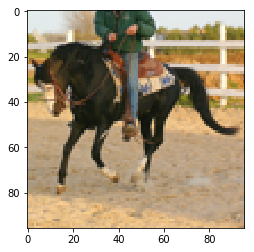

In [123]:
from matplotlib import pyplot as plt
import cv2 as cv
from imutils.paths import list_images
import numpy as np
import time

img1 = cv.imread('test_images/test_image_png_1.png')
plt.imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))

# Compute color histogram

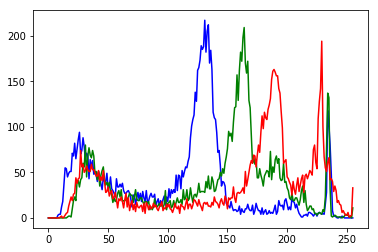

In [97]:
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
plt.show()

# Create a 3D Color Histogram 
The 3D RGB Color Histogram will have 8 bins per red,green and blue channel.
The feature vector will be an (8,8,8) array which when flattened will be a (512,) array.
This will be used to describe each image.

In [98]:
def hist(image,bins):
    hist = cv.calcHist([image], [0, 1, 2],None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv.normalize(hist,hist) #normalize histogram
    return hist.flatten() #return flattened array

# Create an index
Then we apply the above function to all of our images in order to build the index.

In [124]:
start = time.time()
index = {}
for imagePath in list_images('test_images'):
    k = imagePath[imagePath.rfind("/") + 1:]
    index[k] = hist(cv.imread(imagePath),8)
print('Indexed', len(index),'images in',(time.time() - start), 'seconds')

Indexed 8000 images in  4.037588596343994 seconds


# Create distance function & searching
The distance for the histograms is computed using the chi-squared distance:<br>
$$X^2(P,Q)=\frac{1}{2}\sum_{i=0} \frac{(P_i - Q_i)^2}{(P_i - Q_i)}$$

In [105]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
        for (a, b) in zip(histA, histB)])
    # cv.compareHist(histA,histB,method=cv.HISTCMP_CHISQR)
    return d

def search(query):
    results = {}
    for (k, features) in index.items():
        d = chi2_distance(features, query)
        results[k] = d
    results = sorted([(v, k) for (k, v) in results.items()])
    return results

Create a function that given an image as a parameter will provide top 5 similar results

In [111]:
def show_results(img):
    query = hist(img,8)
    results = search(query)
    for i in range(0,6):
        (score, imageName) = results[i]
        img = cv.imread(imageName)
        plt.subplot(2, 3, (i+1))
        plt.axis('off')
        plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
        plt.title(str(round(score, 3)))
    plt.show()

# Results
Each grid(2x3) represents the top results for a given query image. 
The first image in each grid is the query image.<br>
The values above each image are the values computed from the distance function. Lower values mean the image is closer to the query image.

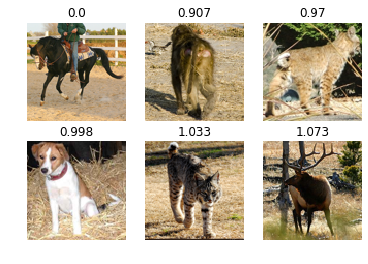

Finished query in 15.937947034835815 seconds


In [126]:
start = time.time()
show_results(img1)
print('Query time:',(time.time() - start), 'seconds')

In [ ]:
show_results(cv.imread('test_images/test_image_png_2.png'))
show_results(cv.imread('test_images/test_image_png_3.png'))
show_results(cv.imread('test_images/test_image_png_4.png'))

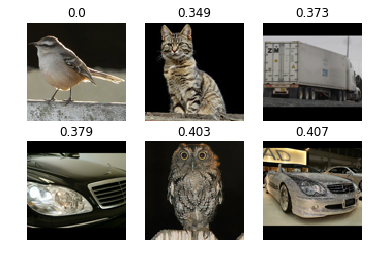

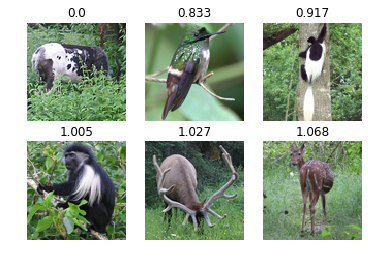

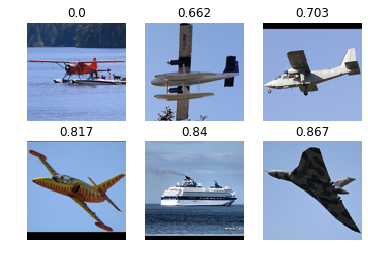

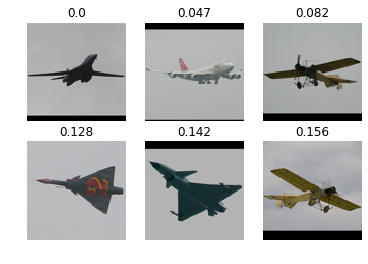

In [122]:
show_results(cv.imread('test_images/test_image_png_8.png'))
show_results(cv.imread('test_images/test_image_png_13.png'))
show_results(cv.imread('test_images/test_image_png_19.png'))
show_results(cv.imread('test_images/test_image_png_43.png'))